In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv("Stock_Price_Dataset.csv")

In [38]:
df

,Date,Open,High,Low,Volume,Close
0,6/30/2010,5.158000,6.084000,4.660000,85935500,4.766000
1,7/1/2010,5.000000,5.184000,4.054000,41094000,4.392000
2,7/2/2010,4.600000,4.620000,3.742000,25699000,3.840000
3,7/6/2010,4.000000,4.000000,3.166000,34334500,3.222000
4,7/7/2010,3.280000,3.326000,2.996000,34608500,3.160000
...,...,...,...,...,...,...
2574,9/21/2020,453.130005,455.679993,407.070007,109476800,449.390015
2575,9/22/2020,429.600006,437.760010,417.600006,79580800,424.230011
2576,9/23/2020,405.160004,412.149994,375.880005,95074200,380.359985
2577,9/24/2020,363.799988,399.500000,351.299988,96561100,387.790009


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2579 non-null   object 
 1   Open    2579 non-null   float64
 2   High    2579 non-null   float64
 3   Low     2579 non-null   float64
 4   Volume  2579 non-null   int64  
 5   Close   2579 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 121.0+ KB


In [40]:
df.describe()

,Open,High,Low,Volume,Close
count,2579.000000,2579.000000,2579.000000,2.579000e+03,2579.000000
mean,49.206686,50.301806,48.073117,3.078217e+07,49.253279
std,57.934102,59.888383,55.852349,2.855717e+07,58.119783
min,3.228000,3.326000,2.996000,5.925000e+05,3.160000
25%,7.159000,7.268000,6.989000,1.047400e+07,7.153000
50%,44.001999,44.660000,43.301998,2.413100e+07,43.924000
75%,59.339000,60.171000,57.841000,3.979150e+07,59.020000
max,502.140015,502.489990,470.510010,3.046940e+08,498.320007


In [41]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

In [42]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [43]:
print(X)

[[5.16e+00 6.08e+00 4.66e+00 8.59e+07]
 [5.00e+00 5.18e+00 4.05e+00 4.11e+07]
 [4.60e+00 4.62e+00 3.74e+00 2.57e+07]
 ...
 [4.05e+02 4.12e+02 3.76e+02 9.51e+07]
 [3.64e+02 4.00e+02 3.51e+02 9.66e+07]
 [3.93e+02 4.09e+02 3.91e+02 6.71e+07]]


In [68]:
print(y)

[  4.766   4.392   3.84  ... 380.36  387.79  407.34 ]


In [69]:
from sklearn.model_selection import train_test_split

# Training
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1)

In [70]:
print(X_train)

[[4.6600e+00 4.8000e+00 4.6420e+00 3.7770e+06]
 [4.9536e+01 5.0400e+01 4.9300e+01 1.7494e+07]
 [4.6740e+00 4.7140e+00 4.5100e+00 3.3465e+06]
 ...
 [4.8200e+01 4.8272e+01 4.6106e+01 4.5230e+07]
 [6.0200e+00 6.0260e+00 5.6520e+00 1.1656e+07]
 [5.2482e+01 5.2940e+01 5.1900e+01 2.5888e+07]]


In [71]:
print(y_train)

[ 4.784 49.492  4.594 ... 46.194  5.74  52.276]


In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [73]:
y_pred=regressor.predict(X_test)
np.set_printoptions(precision=4)
predict=np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

In [74]:
predictions=pd.DataFrame(predict)
predictions.columns=['actual','predicted']

In [75]:
predictions.head(10)

,actual,predicted
0,48.356749,48.598000
1,5.425696,5.348000
2,67.806375,68.570000
3,6.667902,6.430000
4,50.603607,49.812000
5,50.148028,50.004002
6,41.909517,41.400002
7,24.468444,24.690001
8,49.636981,49.785999
9,43.867076,43.472000


Text(0, 0.5, 'Predicted Close Price')

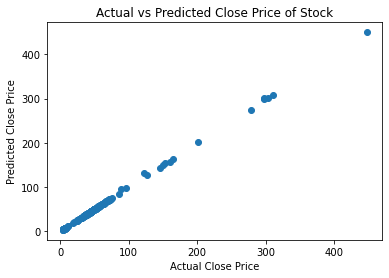

In [76]:
plt.scatter(y_test,y_pred)
plt.title("Actual vs Predicted Close Price of Stock")
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')